In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import pi
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Cargar datos desde el Excel
df = pd.read_excel("./datos/Clasificación_FineTuning&Robertuito2020.xlsx")

# Columnas
true_col = 'Polarity'
model_cols = [
    'Polarity_GPT-4o-mini',
    'Polarity_GPT-4o-mini_Finetuning',
    'Polarity_GPT-4o-mini_Finetuning_v2',
    'Polarity_Robertuito'
]
model_names = [
    'GPT-4o-mini',
    'GPT-4o-mini Fine-tuneado',
    'GPT-4o-mini Fine-tuneado v2',
    'RoBERTuito'
]

labels = ['NEG', 'NEU', 'POS']


In [69]:
def calculate_global_metrics(df, true_col, model_cols, model_names):
    metrics = {'Modelo': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': []}
    
    for col, name in zip(model_cols, model_names):
        filtered_df = df[[true_col, col]].dropna()
        y_true = df[true_col]
        y_pred = df[col]
        
        metrics['Modelo'].append(name)
        metrics['Accuracy'].append((accuracy_score(y_true, y_pred) * 100))
        metrics['Precision'].append(round(precision_score(y_true, y_pred, average='macro', zero_division=1) * 100,2))
        metrics['Recall'].append(round(recall_score(y_true, y_pred, average='macro', zero_division=1) * 100, 2))
        metrics['F1-score'].append(round(f1_score(y_true, y_pred, average='macro', zero_division=1) * 100, 2))

    return pd.DataFrame(metrics)

metrics_df = calculate_global_metrics(df, true_col, model_cols, model_names)
print(metrics_df)


                        Modelo  Accuracy  Precision  Recall  F1-score
0                  GPT-4o-mini      74.2      72.90   73.08     72.84
1     GPT-4o-mini Fine-tuneado      75.2      72.58   72.09     71.66
2  GPT-4o-mini Fine-tuneado v2      76.8      75.56   75.68     75.55
3                   RoBERTuito      72.6      72.02   71.80     71.68


In [70]:
def global_metrics_all_models(df, true_col, model_cols, model_names):
    for col, name in zip(model_cols, model_names):
        # Eliminar filas con valores nulos
        filtered_df = df[[true_col, col]].dropna()
        y_true = filtered_df[true_col]
        y_pred = filtered_df[col]

        # Calcular métricas globales
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro', zero_division=1)
        recall = recall_score(y_true, y_pred, average='macro', zero_division=1)
        f1 = f1_score(y_true, y_pred, average='macro', zero_division=1)

        print(f"=== MÉTRICAS GLOBALES: {name} ===")
        print(f"Accuracy  : {accuracy:.4f}")
        print(f"Precision : {precision:.4f}")
        print(f"Recall    : {recall:.4f}")
        print(f"F1-score  : {f1:.4f}\n")

In [71]:
global_metrics_all_models(df, true_col, model_cols, model_names)

=== MÉTRICAS GLOBALES: GPT-4o-mini ===
Accuracy  : 0.7420
Precision : 0.7290
Recall    : 0.7308
F1-score  : 0.7284

=== MÉTRICAS GLOBALES: GPT-4o-mini Fine-tuneado ===
Accuracy  : 0.7520
Precision : 0.7258
Recall    : 0.7209
F1-score  : 0.7166

=== MÉTRICAS GLOBALES: GPT-4o-mini Fine-tuneado v2 ===
Accuracy  : 0.7680
Precision : 0.7556
Recall    : 0.7568
F1-score  : 0.7555

=== MÉTRICAS GLOBALES: RoBERTuito ===
Accuracy  : 0.7260
Precision : 0.7202
Recall    : 0.7180
F1-score  : 0.7168



In [72]:
def calcular_metricas_por_clase(df, true_col, pred_col, labels):
    resultados = []
    for label in labels:
        tp = ((df[true_col] == label) & (df[pred_col] == label)).sum()
        tn = ((df[true_col] != label) & (df[pred_col] != label)).sum()
        fp = ((df[true_col] != label) & (df[pred_col] == label)).sum()
        fn = ((df[true_col] == label) & (df[pred_col] != label)).sum()

        accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

        resultados.append({
            "Clase": label,
            "Accuracy": round(accuracy, 4),
            "Precision": round(precision, 4),
            "Recall": round(recall, 4),
            "F1-score": round(f1, 4)
        })
    return pd.DataFrame(resultados).set_index("Clase")

In [82]:
metricas_all = []
for col, name in zip(model_cols, model_names):
    print(f"=== Métricas por clase para {name} ===")
    df_metricas = calcular_metricas_por_clase(df, true_col, col, labels)
    df_metricas['Modelo'] = name
    display(df_metricas)
    metricas_all.append(df_metricas.reset_index())

metricas_all = pd.concat(metricas_all, ignore_index=True)
print(metricas_all)


=== Métricas por clase para GPT-4o-mini ===


,Accuracy,Precision,Recall,F1-score,Modelo
Clase,,,,,
NEG,0.828,0.8129,0.7202,0.7637,GPT-4o-mini
NEU,0.774,0.5603,0.6077,0.5830,GPT-4o-mini
POS,0.882,0.8138,0.8644,0.8384,GPT-4o-mini


=== Métricas por clase para GPT-4o-mini Fine-tuneado ===


,Accuracy,Precision,Recall,F1-score,Modelo
Clase,,,,,
NEG,0.856,0.7980,0.8394,0.8182,GPT-4o-mini Fine-tuneado
NEU,0.780,0.6087,0.4308,0.5045,GPT-4o-mini Fine-tuneado
POS,0.868,0.7707,0.8927,0.8272,GPT-4o-mini Fine-tuneado


=== Métricas por clase para GPT-4o-mini Fine-tuneado v2 ===


,Accuracy,Precision,Recall,F1-score,Modelo
Clase,,,,,
NEG,0.858,0.8389,0.7824,0.8097,GPT-4o-mini Fine-tuneado v2
NEU,0.796,0.6000,0.6462,0.6222,GPT-4o-mini Fine-tuneado v2
POS,0.882,0.8278,0.8418,0.8347,GPT-4o-mini Fine-tuneado v2


=== Métricas por clase para RoBERTuito ===


,Accuracy,Precision,Recall,F1-score,Modelo
Clase,,,,,
NEG,0.828,0.8023,0.7358,0.7676,RoBERTuito
NEU,0.760,0.5321,0.6385,0.5804,RoBERTuito
POS,0.864,0.8263,0.7797,0.8023,RoBERTuito


   Clase  Accuracy  Precision  Recall  F1-score                       Modelo
0    NEG     0.828     0.8129  0.7202    0.7637                  GPT-4o-mini
1    NEU     0.774     0.5603  0.6077    0.5830                  GPT-4o-mini
2    POS     0.882     0.8138  0.8644    0.8384                  GPT-4o-mini
3    NEG     0.856     0.7980  0.8394    0.8182     GPT-4o-mini Fine-tuneado
4    NEU     0.780     0.6087  0.4308    0.5045     GPT-4o-mini Fine-tuneado
5    POS     0.868     0.7707  0.8927    0.8272     GPT-4o-mini Fine-tuneado
6    NEG     0.858     0.8389  0.7824    0.8097  GPT-4o-mini Fine-tuneado v2
7    NEU     0.796     0.6000  0.6462    0.6222  GPT-4o-mini Fine-tuneado v2
8    POS     0.882     0.8278  0.8418    0.8347  GPT-4o-mini Fine-tuneado v2
9    NEG     0.828     0.8023  0.7358    0.7676                   RoBERTuito
10   NEU     0.760     0.5321  0.6385    0.5804                   RoBERTuito
11   POS     0.864     0.8263  0.7797    0.8023                   RoBERTuito

In [80]:
def plot_global_metrics(metrics_df):
    labels = metrics_df['Modelo']
    x = np.arange(len(labels))
    width = 0.2

    fig, ax = plt.subplots(figsize=(10, 6))

    pastel_colors = ['#a6cee3', '#fdbf6f', '#b2df8a']
    bars_prec = ax.bar(x - width, metrics_df['Precision'], width, label='Precision', color=pastel_colors[0])
    bars_rec = ax.bar(x, metrics_df['Recall'], width, label='Recall', color=pastel_colors[1])
    bars_f1 = ax.bar(x + width, metrics_df['F1-score'], width, label='F1-score', color=pastel_colors[2])

    # Línea para Accuracy
    ax.plot(x, metrics_df['Accuracy'], marker='o', color='black', label='Accuracy', linewidth=2)
    for xi, acc in zip(x, metrics_df['Accuracy']):
        ax.annotate(f'{acc:.2f}', (xi, acc), textcoords="offset points", xytext=(0,15), ha='center', fontsize=9)

    # Añadir los valores encima de cada barra, más separados
    for bars in [bars_prec, bars_rec, bars_f1]:
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 8),  # Más separación
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

    ax.set_ylabel('Porcentaje (%)')
    ax.set_title('Comparación Global de Métricas entre Modelos')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(0, 100)
    ax.legend()
    ax.grid(axis='y')

    plt.tight_layout()
    plt.show()


In [75]:
def plot_radar(metrics_df):
    categories = list(metrics_df.columns[1:])
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for i in range(len(metrics_df)):
        values = metrics_df.iloc[i, 1:].tolist()
        values += values[:1]
        ax.plot(angles, values, label=metrics_df.iloc[i, 0])
        ax.fill(angles, values, alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_ylim(0, 100)
    ax.set_title('Radar de Comparación de Modelos', size=16)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.show()



In [76]:
def plot_confusion_matrices(df, true_col, model_cols, model_names):
    labels = ['NEG', 'NEU', 'POS']
    for col, name in zip(model_cols, model_names):
        y_true = df[true_col]
        y_pred = df[col]

        cm = confusion_matrix(y_true, y_pred, labels=labels)
        cm_percentage = cm.astype('float') / cm.sum(axis=1, keepdims=True) * 100

        disp = ConfusionMatrixDisplay(confusion_matrix=cm_percentage, display_labels=labels)


        disp.plot(cmap='Blues', values_format='.2f')
        plt.title(f'Matriz de Confusión 2020- {name} (%)')
        plt.xlabel('Predicción')
        plt.ylabel('Realidad')
        plt.tight_layout()
        plt.show()


In [77]:
def plot_polarity_accuracy(df, true_col, model_cols, model_names):
    labels = ['NEG', 'NEU', 'POS']

    for col, name in zip(model_cols, model_names):
        correct = []
        incorrect = []
        for label in labels:
            total = (df[true_col] == label).sum()
            hits = ((df[true_col] == label) & (df[col] == label)).sum()
            misses = total - hits
            correct.append(hits)
            incorrect.append(misses)

        x = np.arange(len(labels))
        width = 0.35

        fig, ax = plt.subplots(figsize=(10, 6))

        ax.bar(x - width/2, correct, width, label='Correctos', color='green')
        ax.bar(x + width/2, incorrect, width, label='Incorrectos', color='red')

        ax.set_ylabel('Cantidad de ejemplos')
        ax.set_title(f'Aciertos y Errores por Polaridad - {name}')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        ax.grid(axis='y')

        plt.tight_layout()
        plt.show()


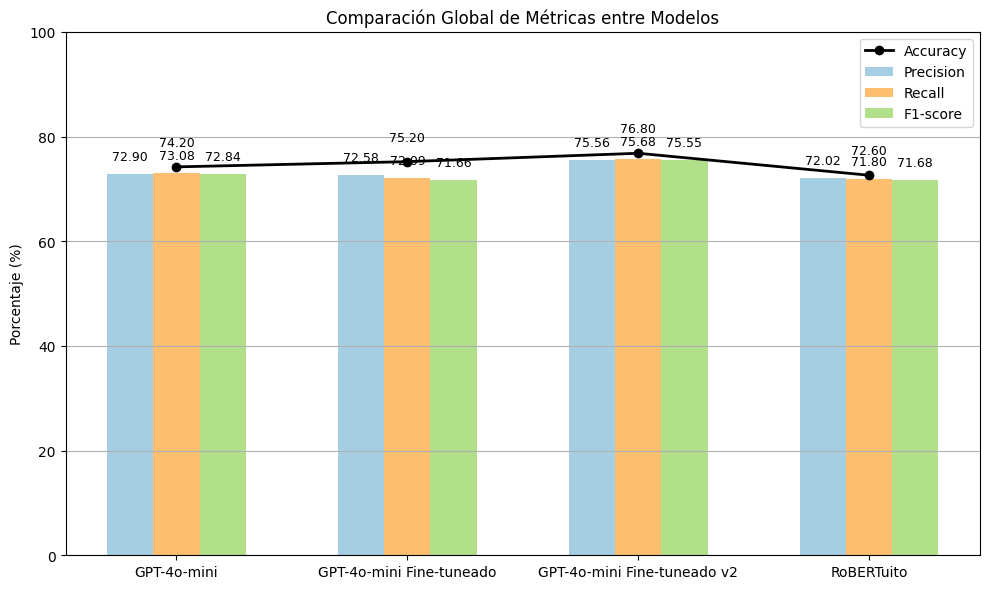

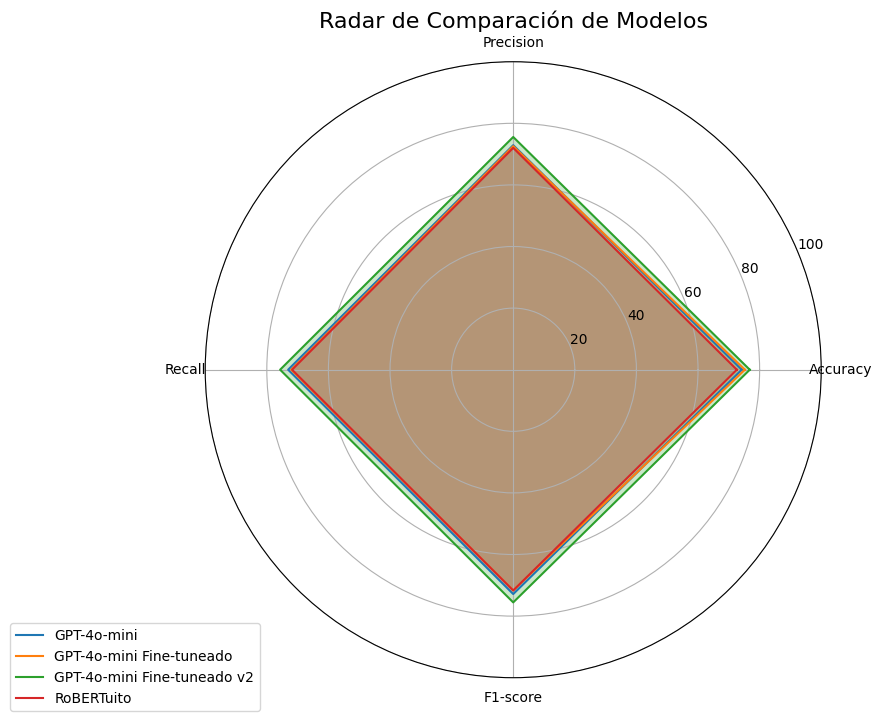

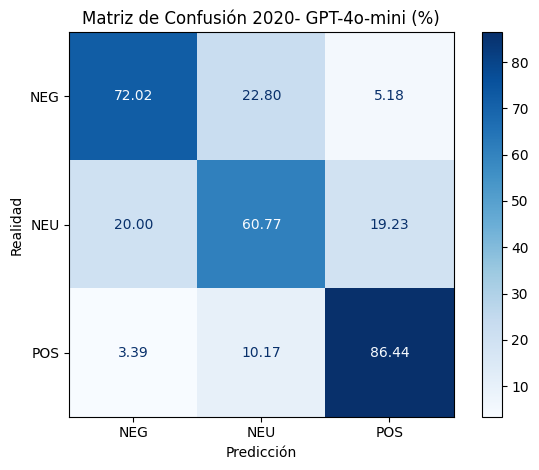

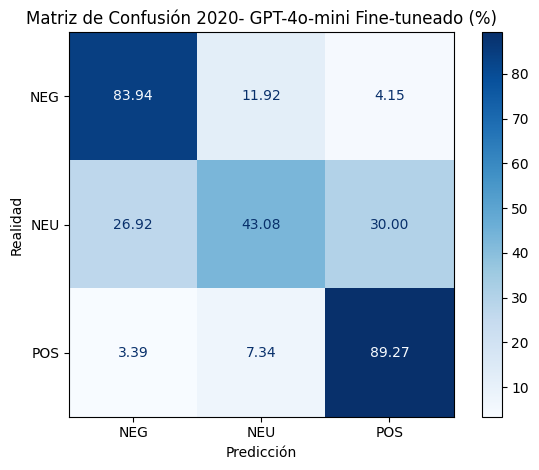

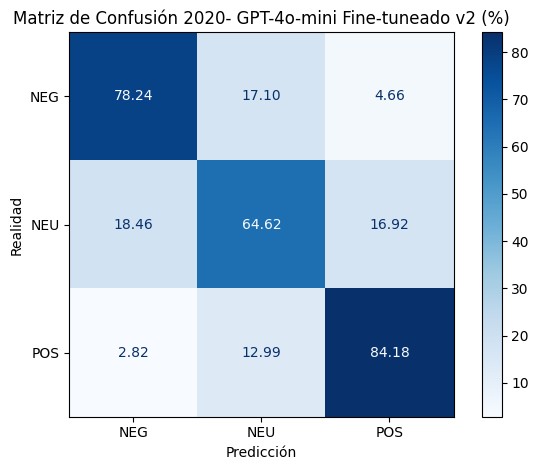

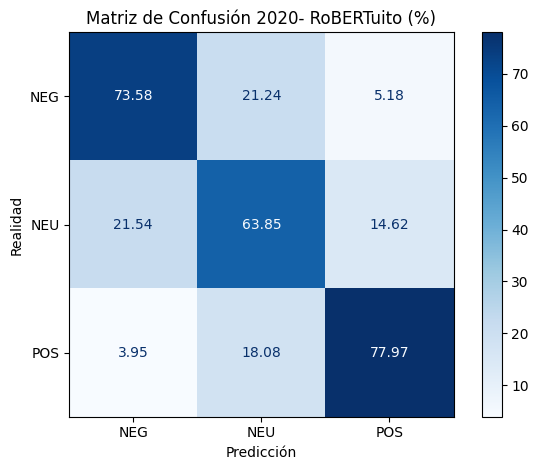

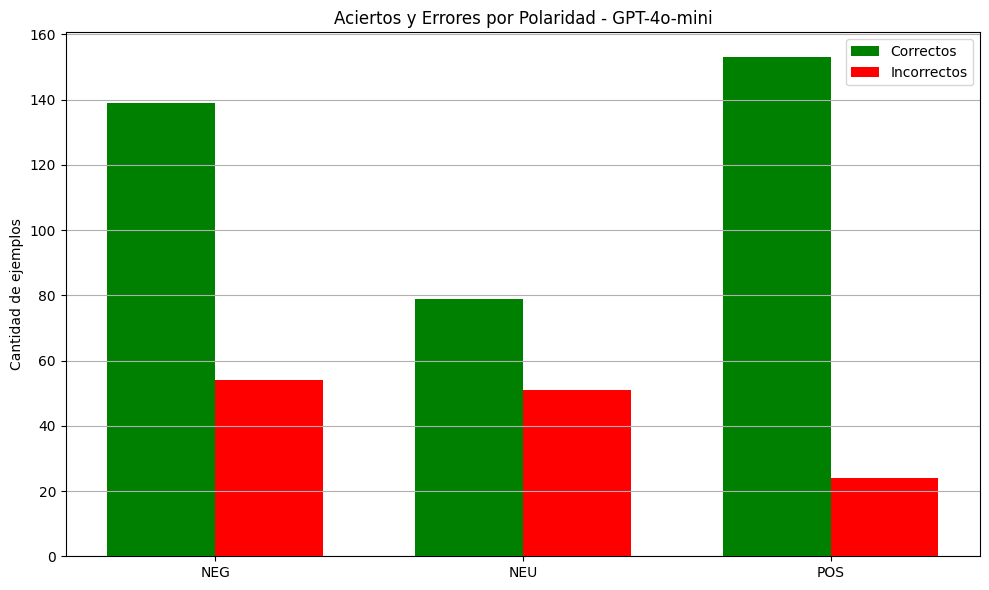

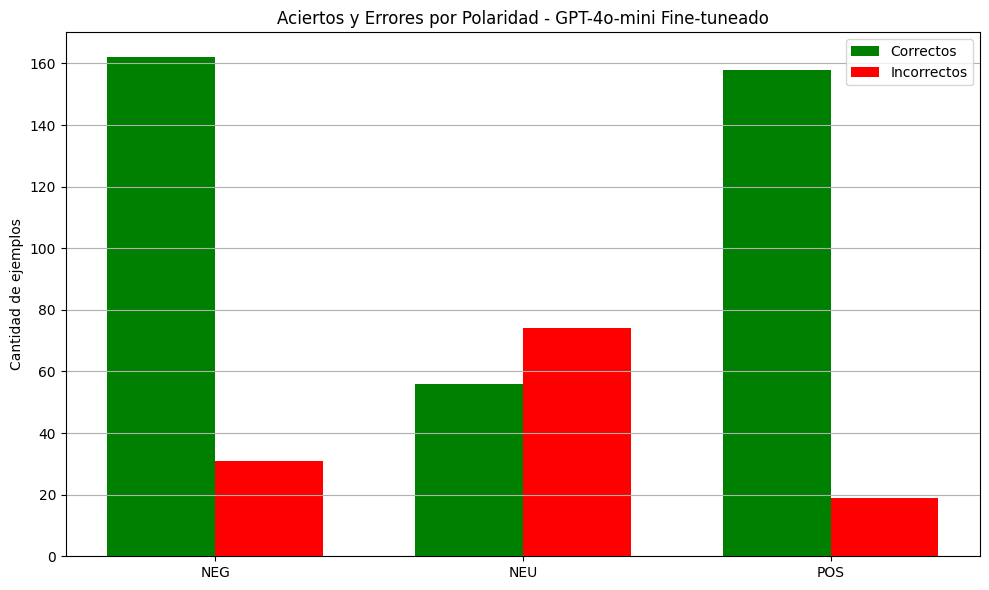

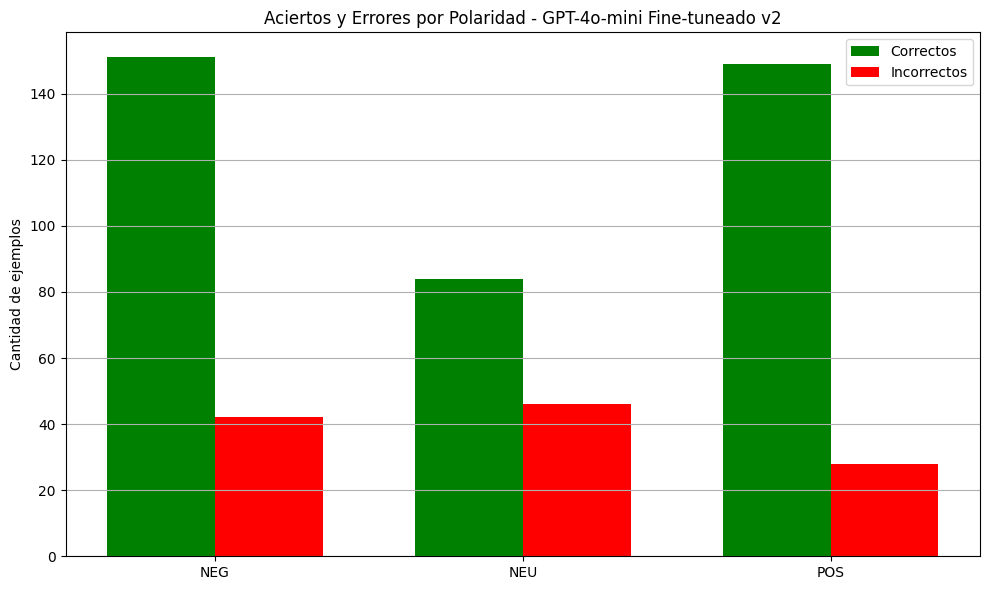

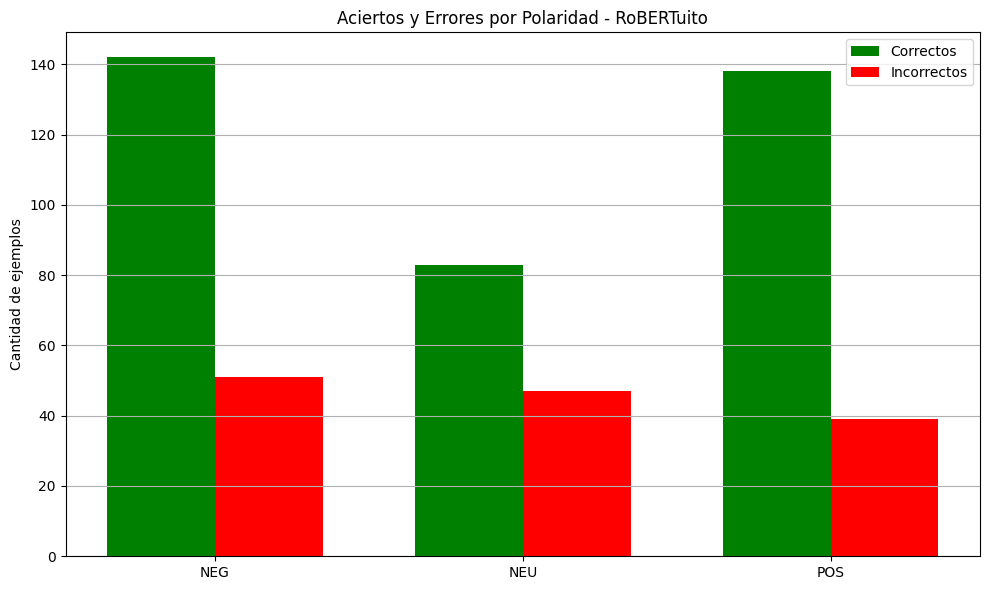

In [81]:
plot_global_metrics(metrics_df)
plot_radar(metrics_df)
plot_confusion_matrices(df, true_col, model_cols, model_names)
plot_polarity_accuracy(df, true_col, model_cols, model_names)


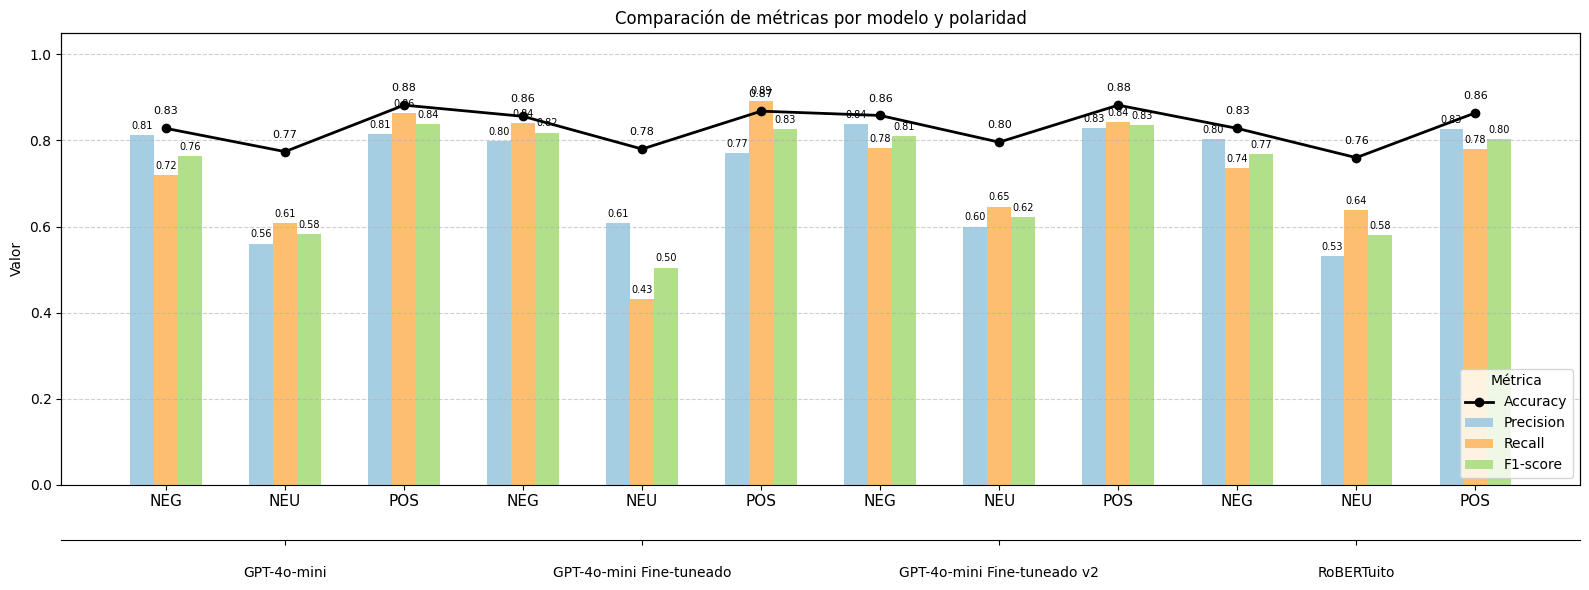

In [88]:
fig, ax = plt.subplots(figsize=(16, 6))

# Preparar los datos
modelos = ['GPT-4o-mini', 'GPT-4o-mini Fine-tuneado', 'GPT-4o-mini Fine-tuneado v2', 'RoBERTuito']
polaridades = ['NEG', 'NEU', 'POS']
parametros = ['Precision', 'Recall', 'F1-score']
width = 0.2

# Crear posiciones para cada barra
x = []
for i, modelo in enumerate(modelos):
    for j, pol in enumerate(polaridades):
        x.append(i * len(polaridades) + j)
x = np.array(x)
n_barras = len(parametros)
offsets = np.linspace(-width, width, n_barras)

for k, param in enumerate(parametros):
    values = []
    for modelo in modelos:
        for pol in polaridades:
            val = metricas_all[(metricas_all['Modelo'] == modelo) & (metricas_all['Clase'] == pol)][param].values[0]
            values.append(val)
    ax.bar(x + offsets[k], values, width=width, label=param, color=colors[param])
    for xi, v in zip(x + offsets[k], values):
        ax.annotate(f'{v:.2f}', xy=(xi, v), xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom', fontsize=7)

# Etiquetas de polaridad (arriba)
ax.set_xticks(x)
ax.set_xticklabels(polaridades * len(modelos), rotation=0, fontsize=11)

# Etiquetas de modelo (abajo, centradas)
x_modelos = [i * len(polaridades) + (len(polaridades)-1)/2 for i in range(len(modelos))]
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(x_modelos)
ax2.set_xticklabels(modelos, fontsize=13, weight='bold')
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward', 40))
ax2.tick_params(axis='x', pad=15)
ax2.set_xlabel('')

ax.set_ylim(0, 1.05)
ax.set_ylabel("Valor")
ax.set_title("Comparación de métricas por modelo y polaridad")
# Dibujar línea de Accuracy por polaridad y modelo
accuracy_values = []
for modelo in modelos:
    for pol in polaridades:
        acc = metricas_all[(metricas_all['Modelo'] == modelo) & (metricas_all['Clase'] == pol)]['Accuracy'].values[0]
        accuracy_values.append(acc)
ax.plot(x, accuracy_values, marker='o', color='black', label='Accuracy', linewidth=2, zorder=10)
for xi, acc in zip(x, accuracy_values):
    ax.annotate(f'{acc:.2f}', (xi, acc), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='black')

ax.legend(title="Métrica", loc='lower right')
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
